In [1]:
import os

from typing import Iterable, Union

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
# from read_data import Data

In [3]:
x = np.array([1, 2, 3, -1, 5])
mx = np.asarray(np.ma.masked_array(x, mask = [0, 0, 0, 1, 0]))
mx

array([ 1,  2,  3, -1,  5])

In [2]:
LABELS = "error"
DATA_DIR = os.path.abspath("../data") 
PLOT_SAVE_DIR = os.path.abspath("../figs")
important_features = ["HROI Change Intensity", "Harmonic Intensity", "Heart size", "Movement detection max", "SNR", "Signal intensity", "Signal regional prominence", "Intensity/Harmonic Intensity (top 5 %)", "SNR Top 5%", "Signal Intensity Top 5%"]

In [3]:
file = "analysis_new.csv"
raw_data = pd.read_csv(os.path.join(DATA_DIR, file))

In [4]:
raw_data

,DATASET,Index,WellID,Well Name,Loop,Channel,fps,version,HROI Change Intensity,Harmonic Intensity,...,SNR,SNR Top 5%,Signal Intensity Top 5%,Signal intensity,Signal regional prominence,Stop frame,empty frames,Heartrate (BPM),ground truth,error
0,OMAR_13FPS_171223125746_Ol_SCN5A_OCA2_WT_28C,18,WE00018,B007,LO001,CO6,13,v1.3.1(feb22-region),44.719887,1087.525938,...,0.278943,0.490223,2354,620,0.141624,40,0,39,159.8,120.8
1,OMAR_13FPS_170908133037_Ol_UFSP1_VEPH1_Temp_21C,116,WE00048,D001,LO002,CO6,13,v1.3.1(feb22-region),44.950140,1782.947941,...,0.335654,0.815673,47500,3492,0.183313,42,0,93,95.9,2.9
2,OMAR_13FPS_171223115056_Ol_SCN5A_OCA2_WT_21C,15,WE00015,B010,LO001,CO6,13,v1.3.1(feb22-region),51.887935,9335.222875,...,0.304907,0.661163,24623,2416,0.195839,43,0,54,52.9,1.1
3,OMAR_13FPS_170908144200_Ol_UFSP1_VEPH1_Temp_28C,84,WE00014,B011,LO002,CO6,13,v1.3.1(feb22-region),51.960520,1148.536539,...,0.252841,0.457436,2588,567,0.115922,44,0,71,172.1,101.1
4,OMAR_13FPS_170908133037_Ol_UFSP1_VEPH1_Temp_21C,124,WE00057,E009,LO002,CO6,13,v1.3.1(feb22-region),54.579830,2513.008272,...,0.280030,0.489647,87826,5475,0.149896,46,0,102,93.3,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,RANDOM_24FPS_210601190528_OlE_HR_IPF2_35C,3,WE00003,A003,LO001,CO6,24,v1.3.1(feb22-region),1116.279079,8614.763537,...,0.439527,0.559436,2584078,437595,0.960578,240,0,246,243.1,2.9
1072,RANDOM_24FPS_210601190528_OlE_HR_IPF2_35C,96,WE00096,H001,LO001,CO6,24,v1.3.1(feb22-region),1149.546129,13578.142910,...,0.591773,0.795341,7044974,990797,0.884980,240,0,222,223.0,1.0
1073,RANDOM_24FPS_210601190528_OlE_HR_IPF2_35C,57,WE00057,E009,LO001,CO6,24,v1.3.1(feb22-region),1158.230024,5955.161769,...,0.724390,0.960477,3745674,541120,0.980361,240,0,276,275.8,0.2
1074,F2_24FPS_210719181906_OlE_HR_IPF2_2x_BQ_35C,48,WE00048,D001,LO001,CO6,24,v1.3.1(feb22-region),1225.109935,6016.243472,...,0.728950,0.920741,7178585,956404,0.995419,240,0,240,241.0,1.0


## Plots

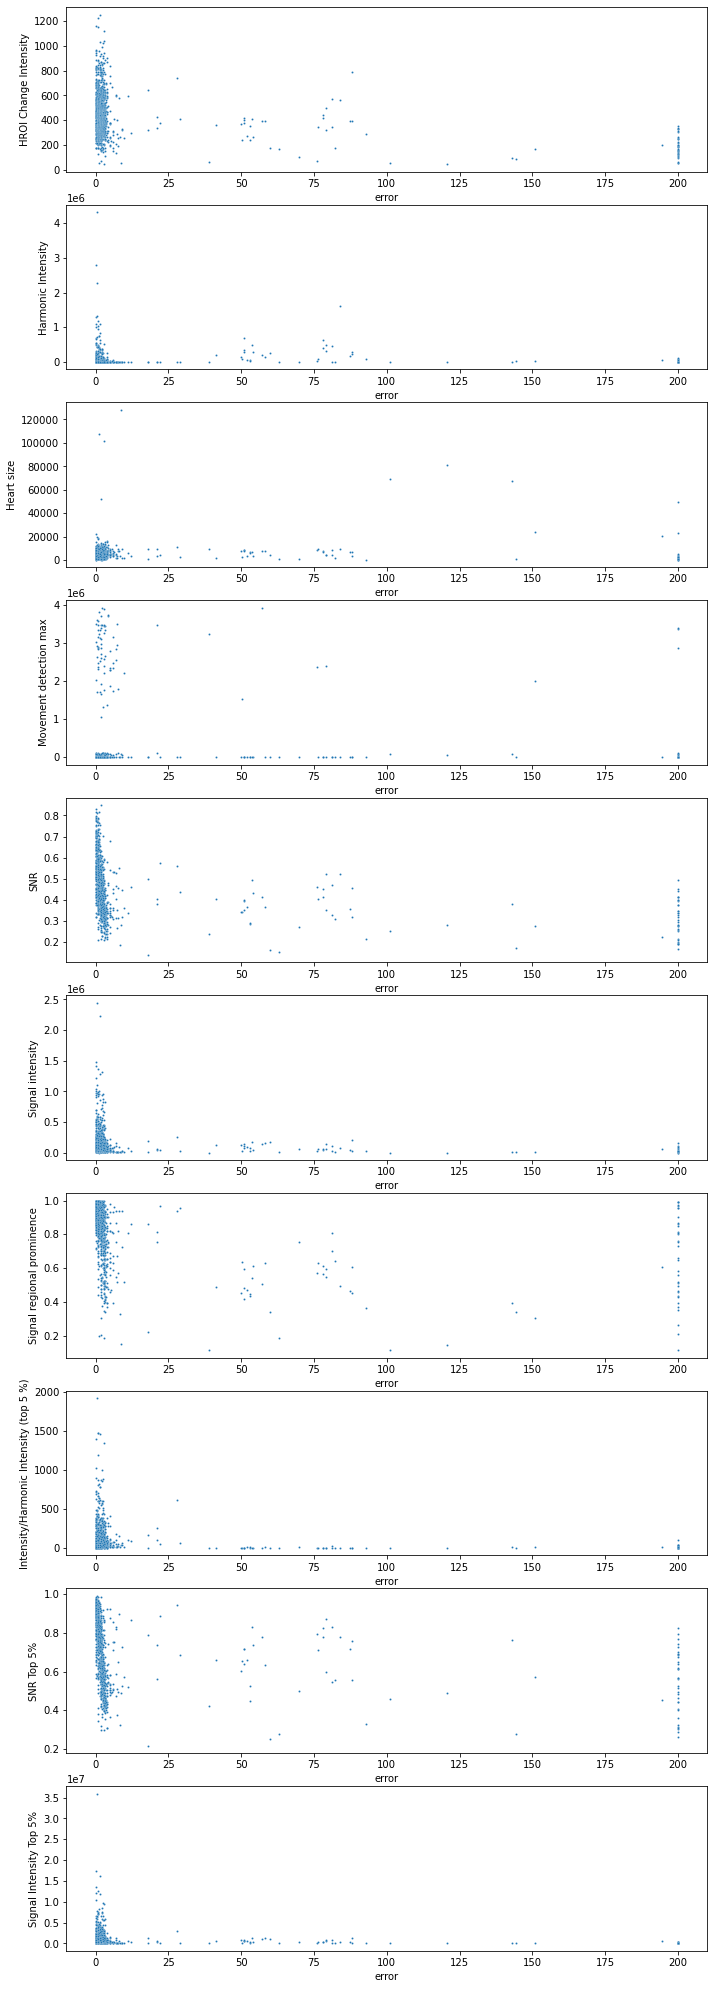

In [5]:
def plot_qc_params(data: pd.DataFrame, 
                   limits: Union[dict, None] = None,
                   figsize: tuple = (10, 30), 
                   save: bool = False,
                   save_name: str = "abc") -> None:
    fig, ax = plt.subplots(nrows = len(important_features), 
                        figsize = figsize,
                        gridspec_kw = dict(left = 0.01, right = 0.9,
                                            bottom = 0.0001, top = 0.9)) 

    for i, feature in enumerate(important_features):
        ax[i].set(ylabel = feature) 
        sns.scatterplot(
            data = data,
            x = LABELS, 
            y = feature,
            s = 4,
            ax = ax[i]
        )
        if limits:
            if feature in limits:
                # Plot the threshold line for each feature.
                for threshold in limits[feature]:
                    ax[i].axhline(y = threshold, xmin = 0, xmax = 200, c = "red", lw = 0.7, label = threshold)    
                    ax[i].legend()
            
        
    if save:
        fig.savefig(os.path.join(PLOT_SAVE_DIR, ".".join([save_name, "png"])), 
                    dpi = 180,
                    bbox_inches = "tight")
    plt.show()
    
    return None

plot_qc_params(raw_data, save = True, save_name = "qc_params")

## Preprocess Data

In [6]:
columns_to_drop = ["DATASET", "Index", "WellID", "Well Name", "Loop", "Channel", "fps", "version", "Stop frame", "empty frames"]

data = raw_data.drop(columns = columns_to_drop)

In [7]:
data.head()

,HROI Change Intensity,Harmonic Intensity,Heart size,Intensity/Harmonic Intensity (top 5 %),Movement detection max,SNR,SNR Top 5%,Signal Intensity Top 5%,Signal intensity,Signal regional prominence,Heartrate (BPM),ground truth,error
0,44.719887,1087.525938,80728,2.164797,66776,0.278943,0.490223,2354,620,0.141624,39,159.8,120.8
1,44.950140,1782.947941,102006,26.641229,84900,0.335654,0.815673,47500,3492,0.183313,93,95.9,2.9
2,51.887935,9335.222875,107527,2.637602,93387,0.304907,0.661163,24623,2416,0.195839,54,52.9,1.1
3,51.960520,1148.536539,69478,2.253352,96960,0.252841,0.457436,2588,567,0.115922,71,172.1,101.1
4,54.579830,2513.008272,128222,34.948661,99932,0.280030,0.489647,87826,5475,0.149896,102,93.3,8.7


In [8]:
columns_to_scale = ["HROI Change Intensity", "Harmonic Intensity", "Heart size", "Movement detection max", "SNR", "Signal intensity", "Signal regional prominence", "Intensity/Harmonic Intensity (top 5 %)", "SNR Top 5%",	"Signal Intensity Top 5%"]
scaler = MinMaxScaler()
scaler.fit(data[columns_to_scale])
data[columns_to_scale] = scaler.transform(data[columns_to_scale])

In [9]:
data

,HROI Change Intensity,Harmonic Intensity,Heart size,Intensity/Harmonic Intensity (top 5 %),Movement detection max,SNR,SNR Top 5%,Signal Intensity Top 5%,Signal intensity,Signal regional prominence,Heartrate (BPM),ground truth,error
0,0.000000,0.000131,0.628524,0.001048,0.016711,0.198403,0.353138,0.000000,0.000022,0.032446,39,159.8,120.8
1,0.000191,0.000293,0.794950,0.013835,0.021316,0.278184,0.773849,0.001255,0.001197,0.079437,93,95.9,2.9
2,0.005931,0.002043,0.838133,0.001295,0.023472,0.234928,0.574113,0.000619,0.000756,0.093557,54,52.9,1.1
3,0.005992,0.000146,0.540531,0.001095,0.024380,0.161682,0.310756,0.000007,0.000000,0.003474,71,172.1,101.1
4,0.008159,0.000462,1.000000,0.018174,0.025135,0.199932,0.352395,0.002375,0.002008,0.041770,102,93.3,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,0.886701,0.001876,0.037184,0.156614,0.001320,0.424311,0.442610,0.071748,0.178800,0.955563,246,243.1,2.9
1072,0.914229,0.003027,0.042463,0.270959,0.001619,0.638490,0.747566,0.195720,0.405131,0.870351,222,223.0,1.0
1073,0.921415,0.001260,0.026179,0.328491,0.001316,0.825054,0.961038,0.104030,0.221155,0.977863,276,275.8,0.2
1074,0.976757,0.001274,0.046624,0.623235,0.001633,0.831468,0.909671,0.199434,0.391059,0.994837,240,241.0,1.0


In [10]:
def convert_error_cat(actual: Iterable, desired: Iterable, threshold: float) -> list:
    return [1 if abs(a - d) >= threshold else 0 for a, d in zip(actual, desired)]

actual = "Heartrate (BPM)"
desired = "ground truth"  
data[LABELS] = convert_error_cat(raw_data[actual], raw_data[desired], 20)

# Remove heart rate columns.
data = data.drop(columns = [actual, desired])
        

In [11]:
data

,HROI Change Intensity,Harmonic Intensity,Heart size,Intensity/Harmonic Intensity (top 5 %),Movement detection max,SNR,SNR Top 5%,Signal Intensity Top 5%,Signal intensity,Signal regional prominence,error
0,0.000000,0.000131,0.628524,0.001048,0.016711,0.198403,0.353138,0.000000,0.000022,0.032446,1
1,0.000191,0.000293,0.794950,0.013835,0.021316,0.278184,0.773849,0.001255,0.001197,0.079437,0
2,0.005931,0.002043,0.838133,0.001295,0.023472,0.234928,0.574113,0.000619,0.000756,0.093557,0
3,0.005992,0.000146,0.540531,0.001095,0.024380,0.161682,0.310756,0.000007,0.000000,0.003474,1
4,0.008159,0.000462,1.000000,0.018174,0.025135,0.199932,0.352395,0.002375,0.002008,0.041770,0
...,...,...,...,...,...,...,...,...,...,...,...
1071,0.886701,0.001876,0.037184,0.156614,0.001320,0.424311,0.442610,0.071748,0.178800,0.955563,0
1072,0.914229,0.003027,0.042463,0.270959,0.001619,0.638490,0.747566,0.195720,0.405131,0.870351,0
1073,0.921415,0.001260,0.026179,0.328491,0.001316,0.825054,0.961038,0.104030,0.221155,0.977863,0
1074,0.976757,0.001274,0.046624,0.623235,0.001633,0.831468,0.909671,0.199434,0.391059,0.994837,0


## Classification

In [12]:
Y = data.pop(LABELS)

X_train, X_test, Y_train, Y_test = train_test_split(data, Y, test_size = 0.3, random_state = 104729)

In [13]:
classifier = DecisionTreeClassifier(random_state = 224737, min_samples_split = 2)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=224737)

In [14]:
print(f"Accuracy on test set: {(classifier.score(X_test, Y_test) * 100):.2f}%")

Accuracy on test set: 95.05%


In [15]:

def plot_decision_tree(tree: sklearn.tree,
                       feature_names: Iterable[str] = data.columns,
                       class_names: Iterable[str] = ["no_error", "error"],
                       figsize: tuple = (16, 9),
                       save_q = True) -> None:
    
    
    plt.figure(figsize = figsize)
    sklearn.tree.plot_tree(tree,
                           feature_names = feature_names,
                           class_names = class_names,
                           fontsize = 14,
                           filled = True)
    
    plt.figure().savefig(os.path.join(PLOT_SAVE_DIR, ".".join(["decision_tree", "jpg"])), format = "jpg", dpi = 180, bbox_inches = "tight") 

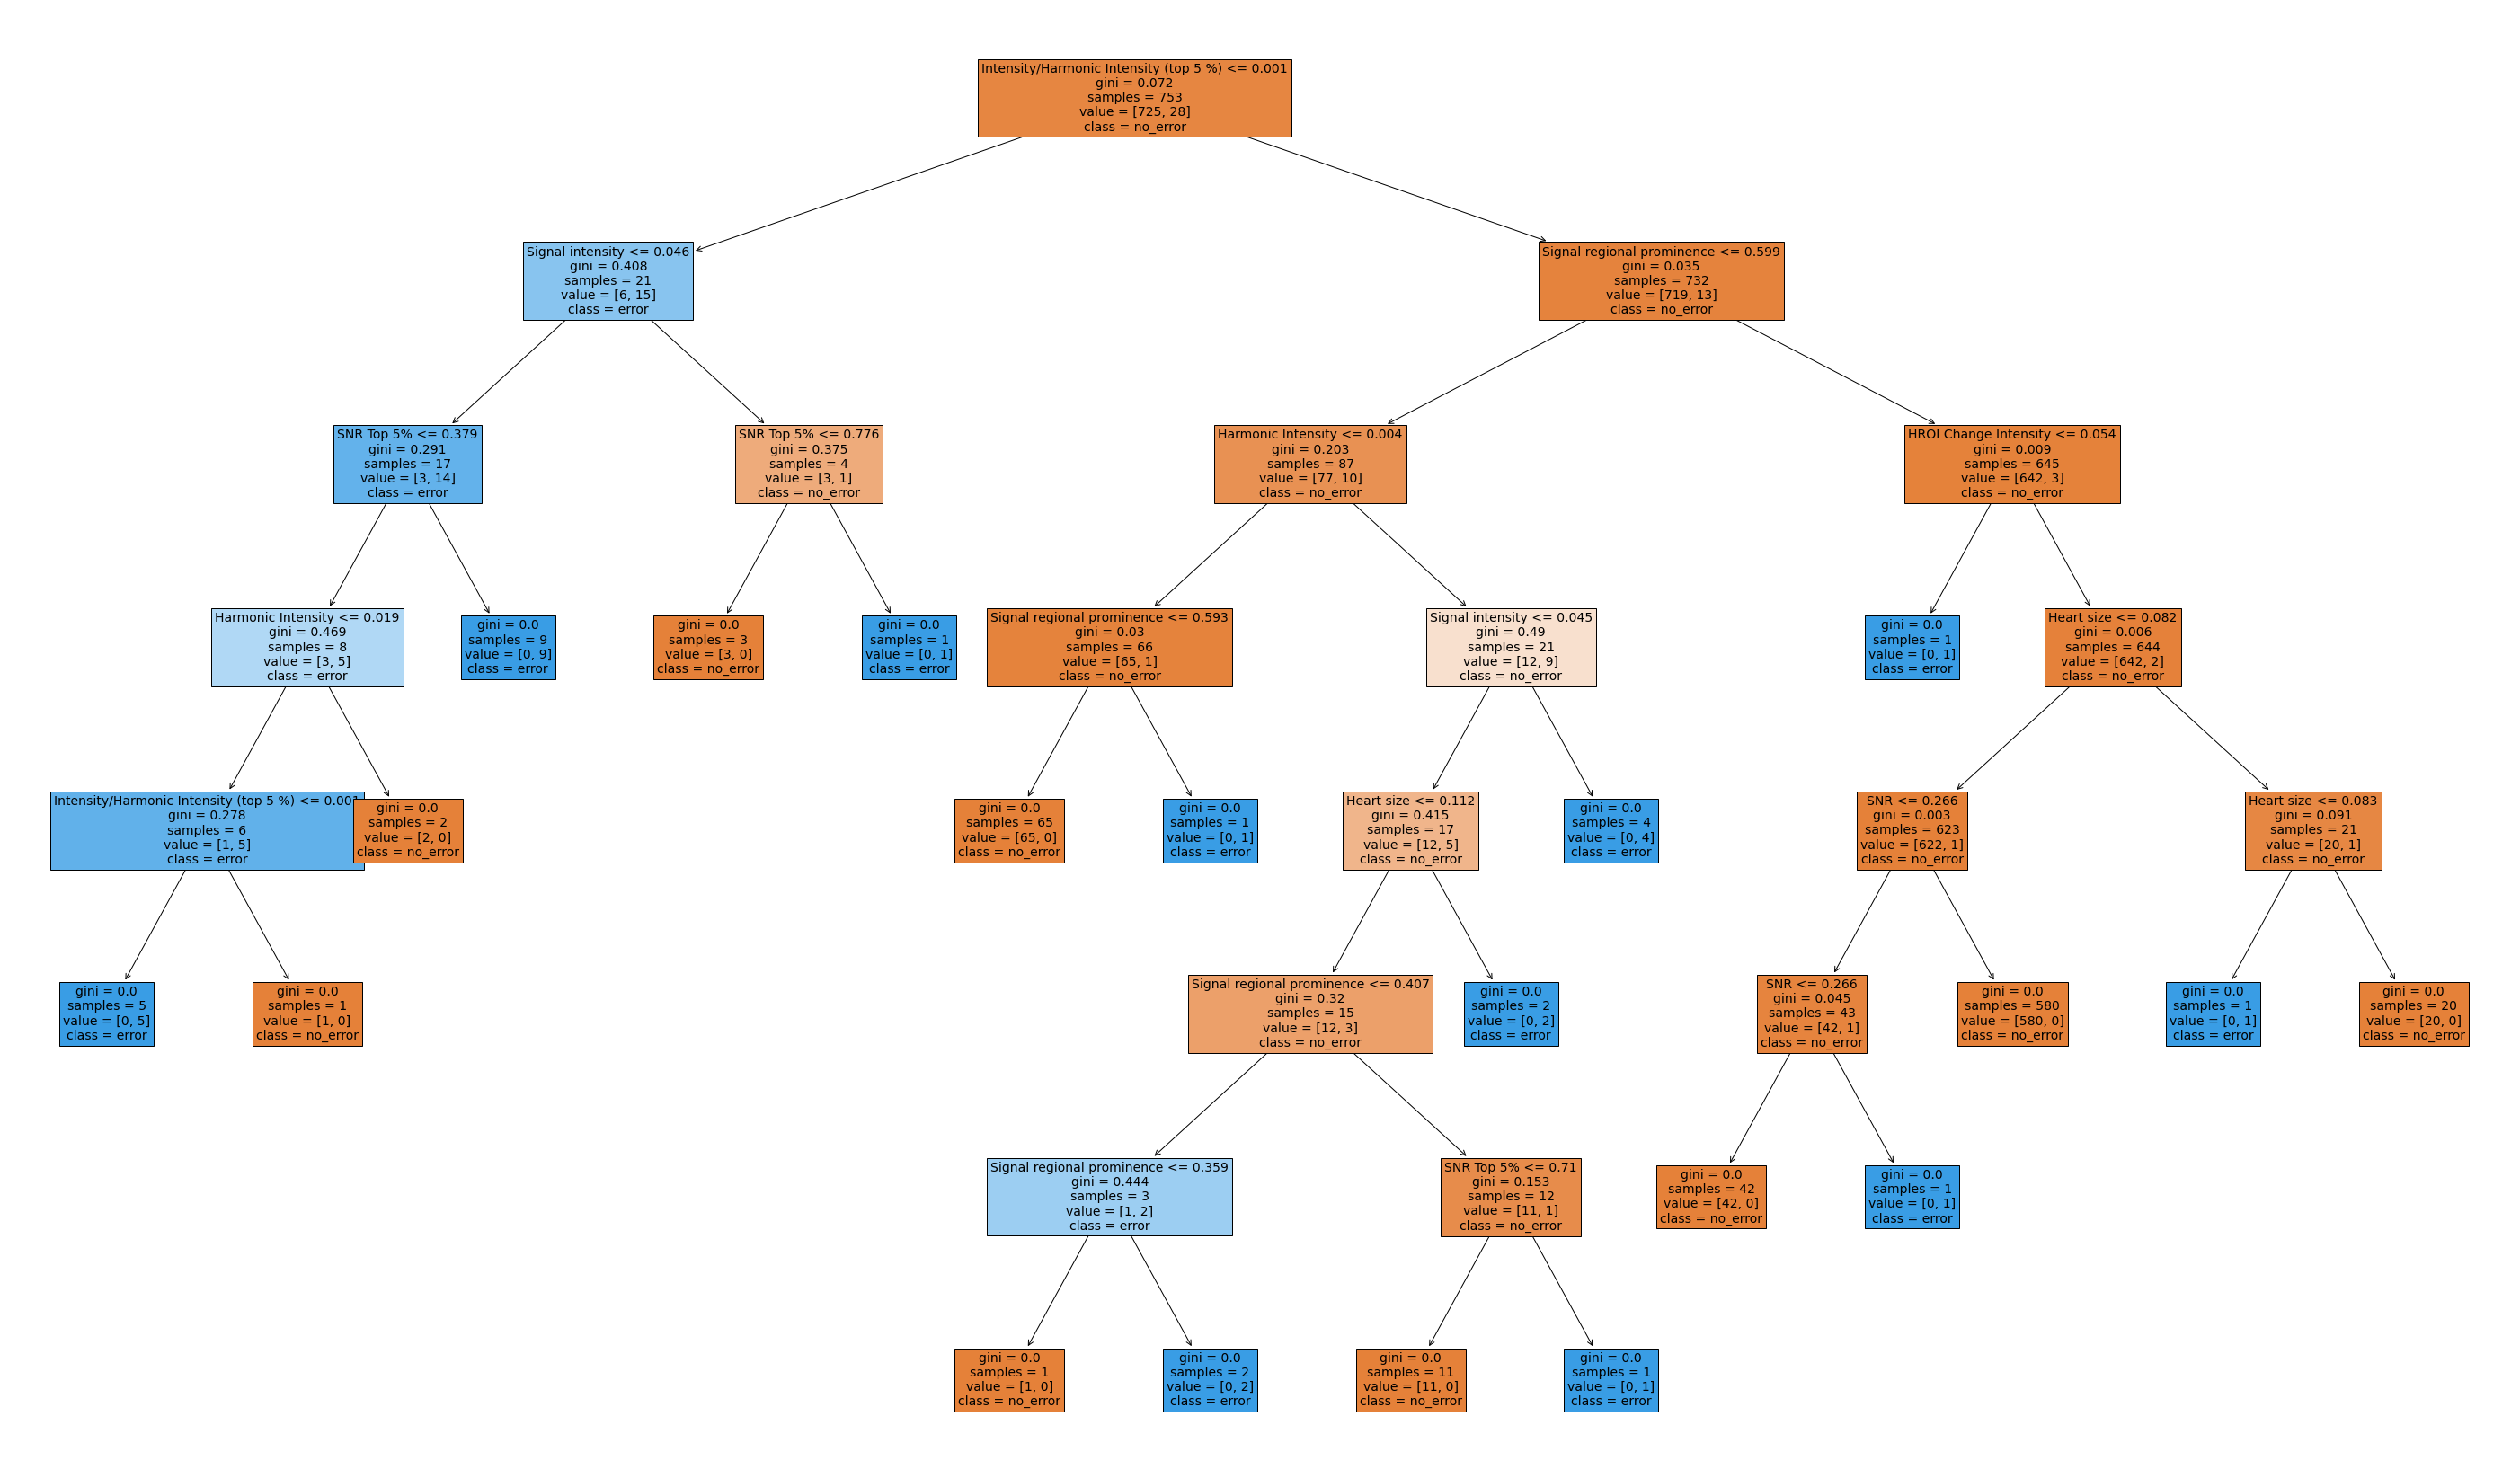

<Figure size 432x288 with 0 Axes>

In [16]:
plot_decision_tree(classifier, figsize = (50, 30))

In [35]:
def get_thresholds(train_data_features: Iterable, classifier: sklearn.tree.DecisionTreeClassifier) -> dict:
    n_nodes = classifier.tree_.node_count
    feature = classifier.tree_.feature
    threshold = classifier.tree_.threshold

    limits = dict()

    for i in range(n_nodes):
        if train_data_features[feature[i]] not in limits:
            limits[train_data_features[feature[i]]] = [threshold[i]]
        else:
            limits[train_data_features[feature[i]]].append(threshold[i])
            
    # Clean limits.
    for _, v in limits.items():
        while (-2 in v):
            v.remove(-2)
            
    return limits

    
def process_limits(qc_thresolds: dict) -> pd.DataFrame:
    df = pd.DataFrame.from_dict(qc_thresolds, orient = "index")
    df["qc_mean"] = df.mean(axis = 1, skipna = True)
    df["qc_max"] = df.max(axis = 1, skipna = True)
    return df

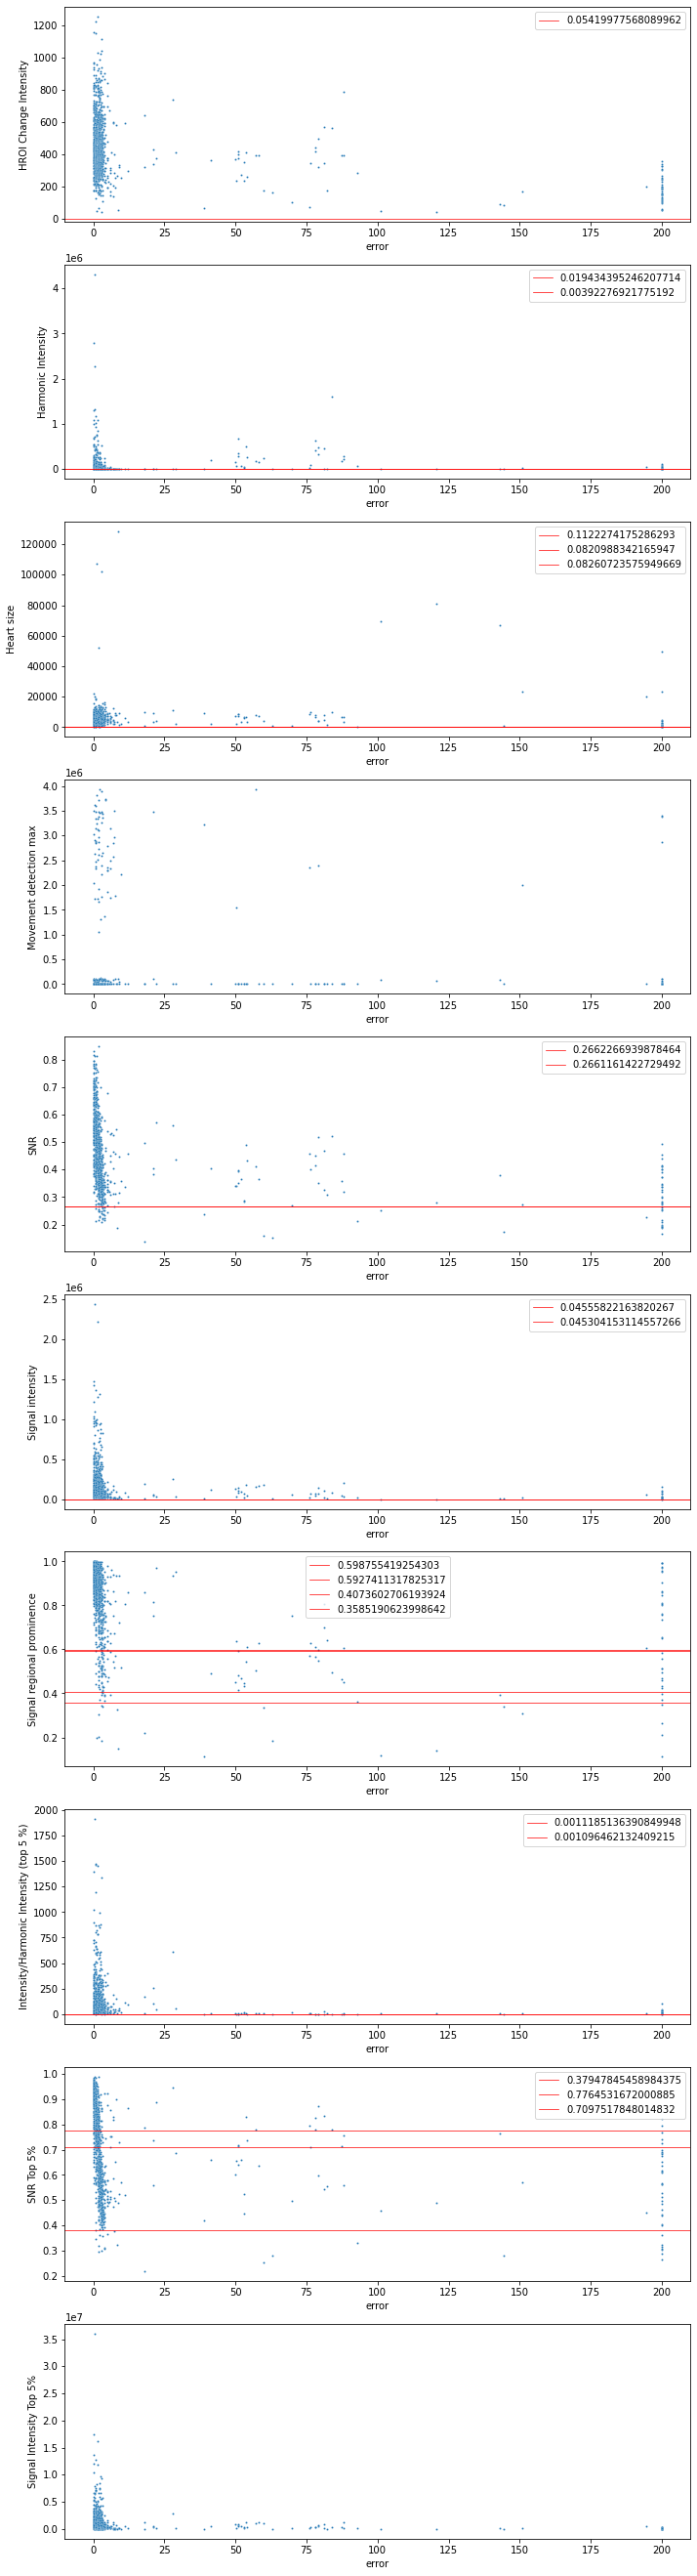

In [38]:
limits = get_thresholds(data.columns, classifier)
data_table = process_limits(limits)
plot_qc_params(raw_data, limits, save = True, save_name = "qc_params_thresholds", figsize = (10, 40))

### Balance Classes

In [62]:
print(f"Percentage of errors in training set: {Y_train.value_counts()[1] / Y_train.value_counts().sum() * 100:.2f}%.")

Percentage of errors in training set: 3.72%.


In [63]:
classifier = DecisionTreeClassifier(random_state = 224737, min_samples_split = 2, class_weight = "balanced")
classifier.fit(X_train, Y_train)
print(f"Accuracy on test set: {(classifier.score(X_test, Y_test) * 100):.2f}%")

Accuracy on test set: 95.36%


### Grid Search

In [64]:
param_grid = {"min_samples_split": list(range(2, 6)), 
              "max_leaf_nodes": list(range(2, 16)),
              "criterion": ["gini", "entropy"]}

classifier = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = param_grid)
classifier.fit(X_train, Y_train)
print(f"Accuracy on test set: {(classifier.score(X_test, Y_test) * 100):.2f}%")

Accuracy on test set: 95.36%


### Things to Do
- Fix class imbalance **DONE**.
- Optimise decision split **DONE**.
- Split information gain check **DONE**.
- Manually fix class imbalance.
- How to decide decision boundaries.

In [1]:
for i1, i2  in [(1, 2), (3, 4)]:
    print(i1, i2)

1 2
3 4
